In [1]:
import pandas as pd
from sodapy import Socrata
client = Socrata("data.cdc.gov", None)

cdc_results = client.get("489q-934x", cause_of_death="Firearm-related injury", year_and_quarter ="2022 Q3", rate_type ="Crude", time_period ='12 months ending with quarter')

# Convert to DataFrame
cdc_results_df = pd.DataFrame.from_records(cdc_results)

In [2]:
cdc_results_df.head()

,year_and_quarter,time_period,cause_of_death,rate_type,unit,rate_overall,rate_sex_female,rate_sex_male,rate_age_1_4,rate_age_5_14,...,rate_south_dakota,rate_tennessee,rate_texas,rate_utah,rate_virginia,rate_vermont,rate_washington,rate_wisconsin,rate_west_virginia,rate_wyoming
0,2022 Q3,12 months ending with quarter,Firearm-related injury,Crude,"Deaths per 100,000",14.7,4.2,25.4,0.9,1.5,...,16.7,21.6,16.1,12.4,15.3,13.4,13,14.5,17.9,23.6


In [3]:
cdc_results_df_2 = cdc_results_df
cdc_results_df_2.head()

,year_and_quarter,time_period,cause_of_death,rate_type,unit,rate_overall,rate_sex_female,rate_sex_male,rate_age_1_4,rate_age_5_14,...,rate_south_dakota,rate_tennessee,rate_texas,rate_utah,rate_virginia,rate_vermont,rate_washington,rate_wisconsin,rate_west_virginia,rate_wyoming
0,2022 Q3,12 months ending with quarter,Firearm-related injury,Crude,"Deaths per 100,000",14.7,4.2,25.4,0.9,1.5,...,16.7,21.6,16.1,12.4,15.3,13.4,13,14.5,17.9,23.6


In [4]:
# Convert format from wide to long
cdc_results_df_2 = pd.melt(cdc_results_df_2, id_vars='year_and_quarter', value_vars=['rate_alaska', 'rate_alabama', 'rate_arkansas', 'rate_arizona', 'rate_california', 'rate_colorado',
       'rate_connecticut', 'rate_district_of_columbia', 'rate_delaware',
       'rate_florida', 'rate_georgia', 'rate_hawaii', 'rate_iowa',
       'rate_idaho', 'rate_illinois', 'rate_indiana', 'rate_kansas',
       'rate_kentucky', 'rate_louisiana', 'rate_massachusetts',
       'rate_maryland', 'rate_maine', 'rate_michigan', 'rate_minnesota',
       'rate_missouri', 'rate_mississippi', 'rate_montana',
       'rate_north_carolina', 'rate_north_dakota', 'rate_nebraska',
       'rate_new_hampshire', 'rate_new_jersey', 'rate_new_mexico',
       'rate_nevada', 'rate_new_york', 'rate_ohio', 'rate_oklahoma',
       'rate_oregon', 'rate_pennsylvania', 'rate_rhode_island',
       'rate_south_carolina', 'rate_south_dakota', 'rate_tennessee',
       'rate_texas', 'rate_utah', 'rate_virginia', 'rate_vermont',
       'rate_washington', 'rate_wisconsin', 'rate_west_virginia',
       'rate_wyoming'],  var_name='STATE_LONG')

In [36]:
# Remove prefix rate_ from state values
cdc_results_df_2['STATE_LONG'] = cdc_results_df_2['STATE_LONG'].str.replace('rate_','')
# Add space for States that are 2 words instead of using underscore _
cdc_results_df_2['STATE_LONG'] = cdc_results_df_2['STATE_LONG'].str.replace('_',' ')
# Convert rates from string to float
cdc_results_df_2['value'] = cdc_results_df_2['value'].astype(float)
cdc_results_df_2.head()

,year_and_quarter,STATE_LONG,value
0,2022 Q3,alaska,23.3
1,2022 Q3,alabama,25.6
2,2022 Q3,arkansas,22.4
3,2022 Q3,arizona,20.9
4,2022 Q3,california,9.1


In [146]:
cdc_results_df_2.sort_values(by = 'value')

,year_and_quarter,STATE_LONG,value
39,2022 Q3,rhode island,3.7
19,2022 Q3,massachusetts,3.9
11,2022 Q3,hawaii,4.3
31,2022 Q3,new jersey,5.3
34,2022 Q3,new york,5.5
6,2022 Q3,connecticut,6.8
4,2022 Q3,california,9.1
30,2022 Q3,new hampshire,10.3
23,2022 Q3,minnesota,10.3
12,2022 Q3,iowa,10.9


In [20]:
# library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
path = "C:\\Users\\jenvo\\OneDrive\\Documents\\CUNY MS\\03 - 608 - Knowledge and Visual Analytics\\Story 3- Do Stricter Gun Laws Reduce Firearm Gun Deaths\\Story 3 - State Total Firearm Safety Policies Adopted.xlsx"
laws_df = pd.read_excel(path, sheet_name="DATA")
laws_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   RANK                               50 non-null     int64 
 1   STATE_LONG                         50 non-null     object
 2   STATE                              50 non-null     object
 3   TOTAL_GUN_SAFETY_POLICIES_ADOPTED  50 non-null     int64 
 4   STRICTNESS                         50 non-null     int64 
 5   Yrows                              50 non-null     int64 
 6   Xcols                              50 non-null     int64 
 7   Ypolicies                          50 non-null     int64 
 8   Xpolicies                          50 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 3.6+ KB


In [37]:
df = pd.merge(laws_df,cdc_results_df_2, on ='STATE_LONG')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RANK                               50 non-null     int64  
 1   STATE_LONG                         50 non-null     object 
 2   STATE                              50 non-null     object 
 3   TOTAL_GUN_SAFETY_POLICIES_ADOPTED  50 non-null     int64  
 4   STRICTNESS                         50 non-null     int64  
 5   Yrows                              50 non-null     int64  
 6   Xcols                              50 non-null     int64  
 7   Ypolicies                          50 non-null     int64  
 8   Xpolicies                          50 non-null     int64  
 9   year_and_quarter                   50 non-null     object 
 10  value                              50 non-null     float64
dtypes: float64(1), int64(7), object(3)
memory usage: 4.7+ KB


In [135]:
df['STATE_LONG'] = df['STATE_LONG'].str.upper()
df['STATE_LBL'] = np.where(np.logical_or(df['STRICTNESS'] == 5,df['STRICTNESS'] == 1), df['STATE_LONG'], df['STATE'])

df['LAWS_RANK'] = df['TOTAL_GUN_SAFETY_POLICIES_ADOPTED'].rank(method='dense')
df['LBL_LAWS_RANK'] = np.where(np.logical_or(df['LAWS_RANK'] >= 45, df['LAWS_RANK'] <= 5), df['STATE_LONG'], df['STATE'])

df['DEATH_RANK'] = df['value'].rank(method='dense')
df['LBL_DEATH_RANK'] = np.where(np.logical_or(df['DEATH_RANK'] >= 45, df['DEATH_RANK'] <= 5), df['STATE_LONG'], df['STATE'])

In [136]:
state_long = ((np.asarray(df['STATE_LONG'])).reshape(10,5))
state = ((np.asarray(df['STATE'])).reshape(10,5))
state_lbl = ((np.asarray(df['STATE_LBL'])).reshape(10,5))
gun_safety = ((np.asarray(df['TOTAL_GUN_SAFETY_POLICIES_ADOPTED'])).reshape(10,5))  
strictness = ((np.asarray(df['STRICTNESS'])).reshape(10,5))  
lbl_death_rank = ((np.asarray(df['LBL_DEATH_RANK'])).reshape(10,5))  
lbl_laws_rank = ((np.asarray(df['LBL_LAWS_RANK'])).reshape(10,5)) 

In [137]:
df.head()

,RANK,STATE_LONG,STATE,TOTAL_GUN_SAFETY_POLICIES_ADOPTED,STRICTNESS,Yrows,Xcols,Ypolicies,Xpolicies,year_and_quarter,value,STATE_LBL,DEATH_RANK,LBL_DEATH_RANK,LAWS_RANK,LBL_LAWS_RANK
0,1,CALIFORNIA,CA,45,5,1,5,1,1,2022 Q3,9.1,CALIFORNIA,7.0,CA,28.0,CA
1,2,ILLINOIS,IL,42,5,3,4,2,1,2022 Q3,14.7,ILLINOIS,18.0,IL,27.0,IL
2,2,NEW YORK,NY,42,5,7,4,3,1,2022 Q3,5.5,NEW YORK,5.0,NEW YORK,27.0,NY
3,4,CONNECTICUT,CT,41,5,2,2,4,1,2022 Q3,6.8,CONNECTICUT,6.0,CT,26.0,CT
4,4,HAWAII,HI,41,5,3,1,5,1,2022 Q3,4.3,HAWAII,3.0,HAWAII,26.0,HI


In [140]:
# Create an array to annotate the heatmap
labels = (np.asarray(["{0} \n {1:0}".format(symb,value)
                      for symb, value in zip(state_lbl.flatten(),
                                               gun_safety.flatten())])
         ).reshape(10,5)

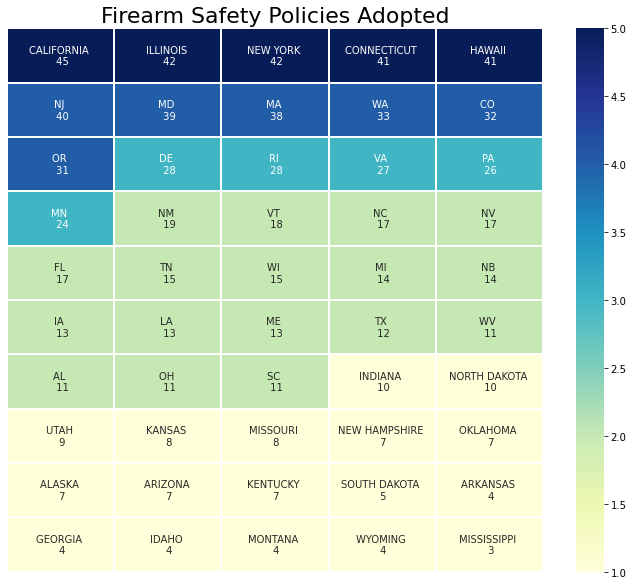

In [145]:
# Define the plot
fig, ax = plt.subplots(figsize=(12,10))

# Add title to the Heat map
title = "Firearm Safety Policies Adopted"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=22)
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])

# Remove the axes
ax.axis('off')

# Use the heatmap function from the seaborn package
sns.heatmap(strictness,annot=labels,fmt="",cmap="Blues",linewidths=0.30,ax=ax)


# Display the Pharma Sector Heatmap
plt.show()

In [55]:
deaths = ((np.asarray(df['value'])).reshape(10,5))
print(deaths)

[[ 9.1 14.7  5.5  6.8  4.3]
 [ 5.3 13.5  3.9 13.  17.8]
 [15.9 12.6  3.7 15.3 15.6]
 [10.3 27.9 13.4 17.3 19.2]
 [14.7 21.6 14.5 15.  12.5]
 [10.9 27.4 11.8 16.1 17.9]
 [25.6 15.9 21.3 17.9 15.8]
 [12.4 17.5 23.8 10.3 19.8]
 [23.3 20.9 18.6 16.7 22.4]
 [19.7 16.6 24.2 23.6 28.4]]


In [142]:
# Create an array to annotate the heatmap
deaths_labels = (np.asarray(["{0} \n {1:0}".format(symb,value)
                      for symb, value in zip(state_lbl.flatten(),
                                               deaths.flatten())])
         ).reshape(10,5)

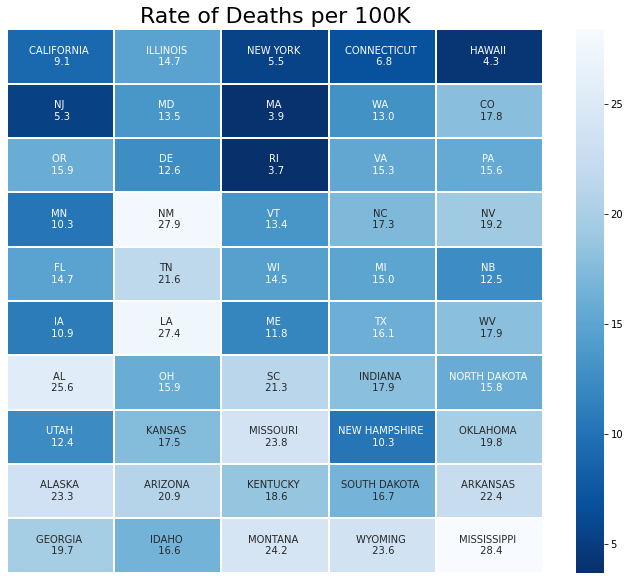

In [147]:
# Define the plot
fig, ax = plt.subplots(figsize=(12,10))

# Add title to the Heat map
#plt.title('(Deaths per 100K)',fontsize=12,x=.5)
#plt.suptitle('Rate of Firearm Deaths per 100K',fontsize=18,x=.5)
title = "Rate of Deaths per 100K"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=22)
ttl = ax.title
ttl.set_position([0.5,1.0])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])

# Remove the axes
ax.axis('off')

# Use the heatmap function from the seaborn package
sns.heatmap(deaths, annot=deaths_labels,fmt="",cmap="Blues",linewidths=0.30,ax=ax)

# Display the Pharma Sector Heatmap
plt.show()

In [52]:
# Create a pivot table
##result = df.pivot(index='Ypolicies',columns='Xpolicies',values='STRICTNESS')
##print(result)

Xpolicies  1  2  3  4  5
Ypolicies               
1          5  4  2  2  1
2          5  3  2  2  1
3          5  3  2  2  1
4          5  3  2  1  1
5          5  3  2  1  1
6          4  3  2  1  1
7          4  2  2  1  1
8          4  2  2  1  1
9          4  2  2  1  1
10         4  2  2  1  1
